# Fashion MNIST example illustrating different optimisers

Load the fashion MNIST data.

In [1]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (val_images, val_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


Show a sample image

In [2]:
from matplotlib import pyplot as plt

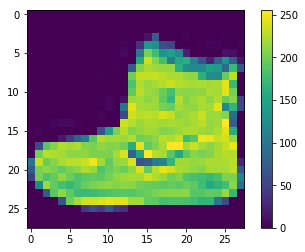

In [3]:
plt.imshow(train_images[0,:,:])
plt.colorbar()
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
val_images = val_images.reshape((10000, 28 * 28))
val_images = val_images.astype("float32") / 255
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In this example we're going to concentrate on training loss. But I've included some validation data as it's still interesting to look at the overall performance of the algorithm.

## Create neural network

In [5]:
from keras import layers
from keras import models
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_dim=28 * 28))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


Save the initial weights so they can be used with various optimisers.

In [7]:
weights0 = model.get_weights()

## Compare optimisers

### Adam optimiser

In [8]:
model.set_weights(weights0)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
hist_Adam = model.fit(train_images, train_labels, epochs=20,
                      validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.5074 - acc: 0.8207 - val_loss: 0.4303 - val_acc: 0.8412
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.3743 - acc: 0.8644 - val_loss: 0.3881 - val_acc: 0.8609
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.3386 - acc: 0.8753 - val_loss: 0.3962 - val_acc: 0.8570
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3126 - acc: 0.8845 - val_loss: 0.3617 - val_acc: 0.8727
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.2985 - acc: 0.8889 - val_loss: 0.3617 - val_acc: 0.8661
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2860 - acc: 0.8932 - val_loss: 0.3394 - val_acc: 0.8797
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 0

### RMSProp optimiser

In [9]:
rms = optimizers.RMSprop(decay=0.001) # nb decay>0 required for convergence guarantee
model.set_weights(weights0)
model.compile(optimizer=rms,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
hist_RMSprop = model.fit(train_images, train_labels, epochs=20,
                         validation_data=(val_images, val_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.5016 - acc: 0.8211 - val_loss: 0.4333 - val_acc: 0.8451
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3684 - acc: 0.8665 - val_loss: 0.3900 - val_acc: 0.8598
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.3383 - acc: 0.8782 - val_loss: 0.3743 - val_acc: 0.8675
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3221 - acc: 0.8847 - val_loss: 0.3736 - val_acc: 0.8681
Epoch 5/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.3105 - acc: 0.8880 - val_loss: 0.3670 - val_acc: 0.8721
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3029 - acc: 0.8902 - val_loss: 0.3646 - val_acc: 0.8710
Epoch 7/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2961 - acc: 0.8935 - val_loss: 0.3618 - val_acc

### SGD optimiser

In [10]:
sgd = optimizers.SGD(lr=0.3)
model.set_weights(weights0)
model.compile(optimizer=sgd,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
hist_SGD = model.fit(train_images, train_labels, epochs=20,
                     validation_data=(val_images, val_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.5991 - acc: 0.7780 - val_loss: 0.4780 - val_acc: 0.8272
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.4285 - acc: 0.8411 - val_loss: 0.4120 - val_acc: 0.8484
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3895 - acc: 0.8573 - val_loss: 0.4401 - val_acc: 0.8381
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3664 - acc: 0.8653 - val_loss: 0.5000 - val_acc: 0.8210
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3492 - acc: 0.8711 - val_loss: 0.4241 - val_acc: 0.8379
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3332 - acc: 0.8763 - val_loss: 0.3995 - val_acc: 0.8529
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3248 - acc: 0.8800 - val_loss: 0.4254 - val_acc

### SGD with weight decay

In [11]:
sgd2 = optimizers.SGD(lr=0.3, decay=0.001)
model.set_weights(weights0)
model.compile(optimizer=sgd2,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
hist_SGD2 = model.fit(train_images, train_labels, epochs=20,
                     validation_data=(val_images, val_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.5395 - acc: 0.7977 - val_loss: 0.4622 - val_acc: 0.8316
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3738 - acc: 0.8622 - val_loss: 0.3984 - val_acc: 0.8519
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3378 - acc: 0.8744 - val_loss: 0.3786 - val_acc: 0.8613
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3160 - acc: 0.8830 - val_loss: 0.3678 - val_acc: 0.8657
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3035 - acc: 0.8871 - val_loss: 0.3554 - val_acc: 0.8697
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2922 - acc: 0.8912 - val_loss: 0.3511 - val_acc: 0.8691
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2833 - acc: 0.8943 - val_loss: 0.3474 - val_acc

## Plot results

In [12]:
import matplotlib.pyplot as plt

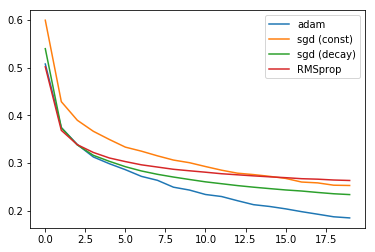

In [13]:
methods = ["adam", "sgd (const)", "sgd (decay)", "RMSprop"]
outputs = [hist_Adam, hist_SGD, hist_SGD2, hist_RMSprop]
losses = [x.history["loss"] for x in outputs]
epochs = range(0, 20)
for m,l in zip(methods, losses):
   plt.plot(epochs, l, "-", label=m)
plt.legend()

Here Adam outperforms both SGD algorithms in later epochs, presumably because it has tuned its learning rate well and/or because it uses different rates for different weights. However RMSprop (another adaptive optmiser) does not perform as well as constant rate SGD. Also, note that the SGD algorithm with decay has a smoother path than constant SGD. This is because its learning rate reduces in later epochs, making it more robust to random variation of gradients.

Which optimiser works best will vary depending on the problem, and constant rate SGD can sometimes be surprisingly competitive with more sophisticated methods.

A big practical advantage of the Adam optimiser is that it usually works well "out of the box" with no need to change its tuning parameters from the defaults. All the other methods here required some parameter tuning to get reasonable performance.